## Observations and Insights 

$1.$There appears to be a correlation between Weight (g) and Tumor Volume (mm3) with a correlation coefficient of 0.84 and an r-squared of 0.708856804770871. The more a mouse weighs the larger the tumor tends to be.
<br>
$2.$ Of the four treatment samples, Capomulin and Ramicane appear to be more succesful at treating tumors with their median final tumor volumes being significantly less than Infubinol and Ceftamin.
<br>
$3.$ Ketapril appears to be the least effective treatment with its mice have the highest mean and median.
<br>
$4.$ It would be helpful to do more analyis on the effecs of treatments by gender to see what type of correlation if any exists.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_stage_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_stage_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
nbr_of_mice = mouse_stage_df["Mouse ID"].nunique()
print(f"There are {nbr_of_mice} unique mice in the dataset.")

There are 249 unique mice in the dataset.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# create a df of the duplicate combination of mouse id and timepoint
stage_duplicate_df =  mouse_stage_df[mouse_stage_df.duplicated(["Mouse ID", "Timepoint"])]

# create numpy array of the deduped mouse ids
stage_duplicate_mice  = np.unique(stage_duplicate_df["Mouse ID"].values)

# print out all duplicate mouse ids
if len(stage_duplicate_mice) == 0:
    print("There are no mice with conflicting and/or duplicate records in the dataset.")
else:
    for mouse in stage_duplicate_mice:
        print(f"Mouse ID {mouse} has conflicting and/or duplicate records in the dataset.")

Mouse ID g989 has conflicting and/or duplicate records in the dataset.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
for mouse in stage_duplicate_mice:
    all_stage_duplicates_df = mouse_stage_df.loc[mouse_stage_df['Mouse ID'] == mouse] 
    
all_stage_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_stage_df.copy()

for i ,row in all_stage_duplicates_df.iterrows():
   mouse_study_df = mouse_study_df.drop(i) 

# create a df of the duplicate combination of mouse id and timepoint
study_duplicate_df =  mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]

# create numpy array of the deduped mouse ids
study_duplicate_mice  = np.unique(study_duplicate_df["Mouse ID"].values)

# print out all duplicate mouse ids
if len(study_duplicate_mice) == 0:
    print("There are no mice with conflicting and/or duplicate records in the dataset.")
else:
    for mouse in study_duplicate_mice:
        print(f"Mouse ID {mouse} has conflicting and/or duplicate records in the dataset.")

There are no mice with conflicting and/or duplicate records in the dataset.


In [6]:
# Checking the number of mice in the clean DataFrame.
nbr_of_mice_cleaned = mouse_study_df["Mouse ID"].nunique()
print(f"There are {nbr_of_mice_cleaned} unique mice in the cleaned dataset.")

There are 248 unique mice in the cleaned dataset.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_grp_df = mouse_study_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = regimen_grp_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = regimen_grp_df["Tumor Volume (mm3)"].median()
tumor_vol_var = regimen_grp_df["Tumor Volume (mm3)"].var()
tumor_vol_std = regimen_grp_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = regimen_grp_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
# Create variables to hold the new column names
tumor_mean_str = "Tumor Volume (mm3) Mean"
tumor_median_str = "Tumor Volume (mm3) Median"
tumor_var_str = 'Tumor Volume (mm3) Variance'
tumor_std_str = 'Tumor Volume (mm3) Std Dev'
tumor_sem_str = 'Tumor Volume (mm3) SEM'

# create a summary df by merging the tumor_vol_mean and the tumor_vol_median series and rename columns
regimen_summ_df = pd.merge(tumor_vol_mean,tumor_vol_median, on="Drug Regimen")
regimen_summ_df = regimen_summ_df.rename(columns={"Tumor Volume (mm3)_x": tumor_mean_str,
                                                  "Tumor Volume (mm3)_y": tumor_median_str
                              })

# Merge the summary df with the tumor_vol_var series
regimen_summ_df = pd.merge(regimen_summ_df, tumor_vol_var, on="Drug Regimen")
regimen_summ_df = regimen_summ_df.rename(columns={"Tumor Volume (mm3)": tumor_var_str
                              })

# Merge the summary df with the tumor_vol_std series
regimen_summ_df = pd.merge(regimen_summ_df, tumor_vol_std, on="Drug Regimen")
regimen_summ_df = regimen_summ_df.rename(columns={"Tumor Volume (mm3)": tumor_std_str
                              })

# Merge the summary df with the tumor_vol_sem series
regimen_summ_df = pd.merge(regimen_summ_df, tumor_vol_sem, on="Drug Regimen")
regimen_summ_df = regimen_summ_df.rename(columns={"Tumor Volume (mm3)": tumor_sem_str
                              })

regimen_summ_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

regimen_grp_df["Tumor Volume (mm3)"].aggregate(['mean', 'median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

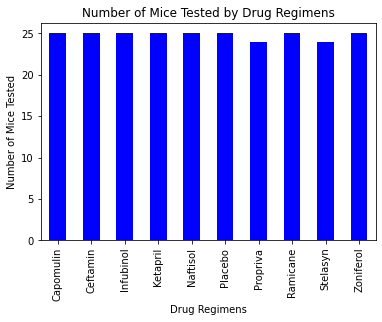

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_mouse_cnt_df =  mouse_study_df.groupby('Drug Regimen')['Mouse ID'].nunique()

# Create a bar chart based off of mouse_cnt_df
drug_mouse_cnt_chart = drug_mouse_cnt_df.plot(kind='bar', color = 'blue')

# Set the title, xlabel and ylabel 
plt.title("Number of Mice Tested by Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested")

plt.show()

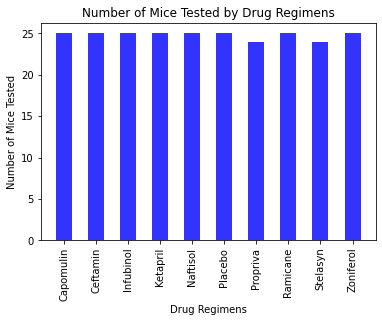

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# get the distinct count of mich by regimen
drug_mice_cnt = mouse_study_df.groupby('Drug Regimen')['Mouse ID'].nunique()

# set axis 
x_axis = np.arange(len(drug_mice_cnt))
x_labels = list(drug_mice_cnt.index)

# set the ticks
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, x_labels, rotation=90)

# plot the bar graph
plt.bar(x_axis, drug_mice_cnt, color='blue', alpha=0.8, align="center", width=.5)

# set title and labels
plt.title("Number of Mice Tested by Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested")

plt.show()

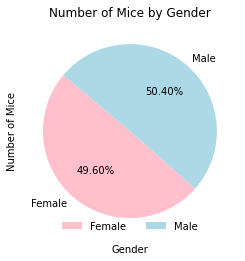

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# get count of unique mice by gender
gender_mouse_df =  mouse_study_df.groupby('Sex')['Mouse ID'].nunique()

# declare the colors
colors = ["pink","lightblue"]

# plot the pie chart
fig, ax = plt.subplots()

gender_mouse_chart = gender_mouse_df.plot(kind='pie', y = 'Mouse ID', colors = colors, subplots=True, figsize=(7, 4),autopct="%1.2f%%", startangle=140)

# set title and labels, etc
plt.title("Number of Mice by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Mice")
ax.legend(frameon=False, loc='lower center', ncol=2)

plt.show()

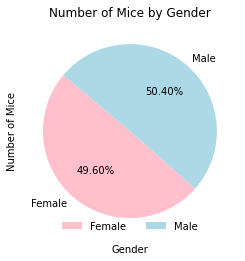

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# get count of unique mice by gender
gender_mice_cnt = mouse_study_df.groupby('Sex')['Mouse ID'].nunique()

# declare the colors
colors = ["pink","lightblue"]

# plot the pie chart
fig, ax = plt.subplots()
x_labels = list(gender_mice_cnt.index)

plt.pie(gender_mice_cnt, labels=x_labels, autopct="%1.2f%%", startangle=140, colors = colors)

# set title and labels
plt.title("Number of Mice by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Mice")
ax.legend(frameon=False, loc='lower center', ncol=2)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftami

# Start by getting the last (greatest) timepoint for each mouse
timepoint_group_df =  mouse_study_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(timepoint_group_df , mouse_study_df, how='inner', left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID","Timepoint"])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# loop through the last timepoint andtumor volume to the list where the treatment is Capomulin, Ramicane, Infubinol, or Ceftami  
for treatment in treatment_names:
    tumor_volume = []
    for index, row in last_timepoint_df.iterrows():
        if row[2] == treatment:
            tumor_volume.append(row[6])
            
    tumor = pd.Series(tumor_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    one_step = 1.5

    # set upper and lower limites 
    lower_bound = lowerq - (one_step*iqr)
    upper_bound = upperq + (one_step*iqr)    
    
    for item in tumor.iteritems():     
        if item[1] < lower_bound:
            print(f'{item[1]} is an outlier in the {treatment} sample.' )
        elif item[1] > upper_bound:
            rint(f'{item[1]} is an outlier.' )
    

36.321345799999996 is an outlier in the Infubinol sample.


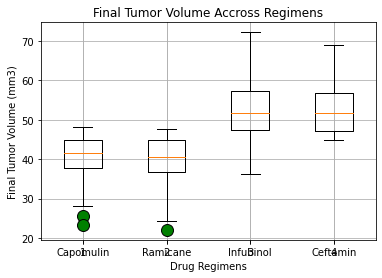

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create a df for each regimen
Capomulin_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']
Ramicane_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Ramicane']
Infubinol_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Infubinol']
Ceftamin_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Ceftamin']

# create a list of tumor volumes series for eaach regimen
data = [Capomulin_df['Tumor Volume (mm3)']
        ,Ramicane_df['Tumor Volume (mm3)']
        ,Infubinol_df['Tumor Volume (mm3)']
        ,Ceftamin_df['Tumor Volume (mm3)']
       ]

fig, ax = plt.subplots()

x_axis = np.arange(len(treatment_names))
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations, treatment_names)

ax.set_title('Final Tumor Volume Accross Regimens')
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume (mm3)")

# set the outliers to display as green circles
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

ax.boxplot(data, flierprops=flierprops)

plt.grid()
plt.show()

## Line and Scatter Plots

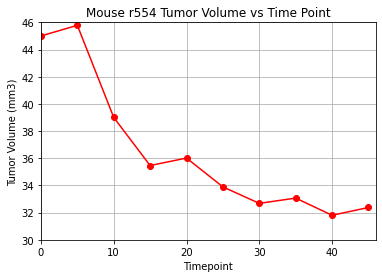

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']

mouse_sample = Capomulin_df.sample()
mouse_id = list(mouse_sample['Mouse ID'])

mouse_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] == mouse_id[0]].sort_values(by = "Timepoint", ascending = True)

# set variables for limits
max_tumor = int(mouse_df.groupby('Mouse ID')['Tumor Volume (mm3)'].max())
min_tumor = int(mouse_df.groupby('Mouse ID')['Tumor Volume (mm3)'].min())
x_limit = int(mouse_df.groupby('Mouse ID')['Timepoint'].max())

fig, ax = plt.subplots()

ax.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'], c = 'r',marker='o')

# set title and labels
plt.title(f"Mouse {mouse_id[0]} Tumor Volume vs Time Point")
plt.xlabel("Timepoint") 
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.ylim(min_tumor-1, max_tumor+1)
plt.xlim(0, x_limit+1)
plt.show()

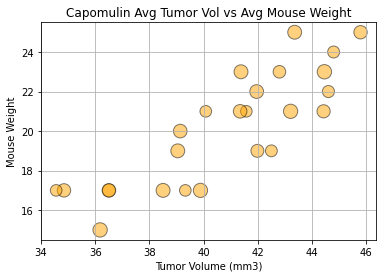

In [17]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_group_df = Capomulin_df.groupby(['Mouse ID'])

# create series of avg tumor and weight
avg_tumor = Capomulin_group_df['Tumor Volume (mm3)'].mean() 
avg_weight = Capomulin_group_df['Weight (g)'].mean()

# set title and labels
plt.title("Capomulin Avg Tumor Vol vs Avg Mouse Weight") 
plt.xlabel("Tumor Volume (mm3)") 
plt.ylabel("Mouse Weight")
plt.grid()

# plot the scatter plot
plt.scatter(avg_tumor, avg_weight, marker="o", facecolors="orange", edgecolors="black",
            s=tumor*3, alpha=0.5, )

## Correlation and Regression

The correlation coefficient between Weight (g) and Tumor Volume (mm3) is 0.84
The r-squared is: 0.7088568047708717


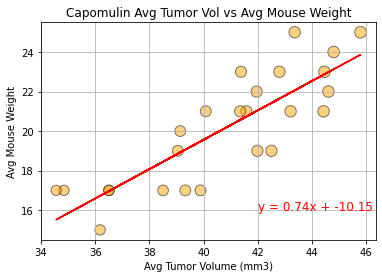

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# declare tumor and weight series variables
tumor = avg_tumor
weight = avg_weight 

# calculate the correlation coefficient
corr_cof=round(st.pearsonr(tumor,weight)[0],2)

print(f'The correlation coefficient between Weight (g) and Tumor Volume (mm3) is {corr_cof}')

# set title and labels, etc
plt.title("Capomulin Avg Tumor Vol vs Avg Mouse Weight") 
plt.xlabel("Avg Tumor Volume (mm3)") 
plt.ylabel("Avg Mouse Weight")
plt.grid()

# set the x and y values for the regression calculations
x_values = tumor
y_values = weight

# run the regression calculations using code borrowed from  the regression.ipynb activity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="orange", edgecolors="black",
            s=tumor*3, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(42,16),fontsize=12,color="red")
plt.show()